<a href="https://colab.research.google.com/github/Murari2124/Damage-prediction-ina-frame-strucutre-using-machine-learning/blob/main/mtp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/FINAL DATASET.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataset for an overview
data.head()

,Member_1_name,Member_2_name,E1,E1.1,Frequency_1,Frequency_2,Frequency_3,Frequency_4,Frequency_5,Frequency_6,Frequency_7,Frequency_8
0,STEEL_COL1,NaN,100000000000,200000000000,2.702044,3.555486,4.296314,6.326884,6.541992,7.622354,7.713820,7.719549
1,STEEL_COL1,NaN,101000000000,200000000000,2.702456,3.556237,4.297659,6.327693,6.542130,7.622354,7.713821,7.720343
2,STEEL_COL1,NaN,102000000000,200000000000,2.702866,3.556984,4.299000,6.328497,6.542268,7.622354,7.713822,7.721134
3,STEEL_COL1,NaN,103000000000,200000000000,2.703273,3.557727,4.300338,6.329296,6.542406,7.622354,7.713824,7.721922
4,STEEL_COL1,NaN,104000000000,200000000000,2.703677,3.558467,4.301671,6.330090,6.542544,7.622354,7.713824,7.722707


In [ ]:
# Renaming 'E1.1' to 'E2' for clarity
data = data.rename(columns={'E1.1': 'E2'})

# Check for missing values and data types
missing_values = data.isnull().sum()
data_types = data.dtypes

missing_values, data_types

(Member_1_name      0
 Member_2_name    800
 E1                 0
 E2                 0
 Frequency_1        0
 Frequency_2        0
 Frequency_3        0
 Frequency_4        0
 Frequency_5        0
 Frequency_6        0
 Frequency_7        0
 Frequency_8        0
 dtype: int64,
 Member_1_name     object
 Member_2_name     object
 E1                 int64
 E2                 int64
 Frequency_1      float64
 Frequency_2      float64
 Frequency_3      float64
 Frequency_4      float64
 Frequency_5      float64
 Frequency_6      float64
 Frequency_7      float64
 Frequency_8      float64
 dtype: object)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Features and target for the first model (predicting E1)
features = data.iloc[:, 4:]  # Frequency columns
target_E1 = data['E1']

In [ ]:
# Splitting the dataset into training and testing sets
X_train_E1, X_test_E1, y_train_E1, y_test_E1 = train_test_split(features, target_E1, test_size=0.2, random_state=42)


In [ ]:

# Training a Decision Tree Regressor for E1
regressor_E1 = DecisionTreeRegressor(random_state=42)
regressor_E1.fit(X_train_E1, y_train_E1)

# Predicting and evaluating the model
y_pred_E1 = regressor_E1.predict(X_test_E1)
mse_E1 = mean_squared_error(y_test_E1, y_pred_E1)
r2_E1 = r2_score(y_test_E1, y_pred_E1)

mse_E1, r2_E1

(6.1219435736677106e+19, 0.9268027247300217)

In [ ]:
# Target for the second model (predicting E2)
target_E2 = data['E2']

# Splitting the dataset for E2 predictions
X_train_E2, X_test_E2, y_train_E2, y_test_E2 = train_test_split(features, target_E2, test_size=0.2, random_state=42)

# Training a Decision Tree Regressor for E2
regressor_E2 = DecisionTreeRegressor(random_state=42)
regressor_E2.fit(X_train_E2, y_train_E2)

# Predicting and evaluating the model for E2
y_pred_E2 = regressor_E2.predict(X_test_E2)
mse_E2 = mean_squared_error(y_test_E2, y_pred_E2)
r2_E2 = r2_score(y_test_E2, y_pred_E2)

mse_E2, r2_E2

(6.744514106583073e+19, 0.936036573519667)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encoding the 'Member_1_name' column
label_encoder = LabelEncoder()
encoded_member_1 = label_encoder.fit_transform(data['Member_1_name'])

# Features (modal frequencies) and target (encoded 'Member_1_name')
target_member_1 = encoded_member_1

# Splitting the dataset into training and testing sets for the classification model
X_train_member_1, X_test_member_1, y_train_member_1, y_test_member_1 = train_test_split(
    features, target_member_1, test_size=0.2, random_state=42)

# Checking the shape of the training and testing sets
X_train_member_1.shape, X_test_member_1.shape, y_train_member_1.shape, y_test_member_1.shape

((1275, 8), (319, 8), (1275,), (319,))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Training a Decision Tree Classifier
classifier_member_1 = DecisionTreeClassifier(random_state=42)
classifier_member_1.fit(X_train_member_1, y_train_member_1)

# Predicting and evaluating the classifier
y_pred_member_1 = classifier_member_1.predict(X_test_member_1)
accuracy_member_1 = accuracy_score(y_test_member_1, y_pred_member_1)
classification_rep_member_1 = classification_report(y_test_member_1, y_pred_member_1)

accuracy_member_1, classification_rep_member_1

(0.677115987460815,
 '              precision    recall  f1-score   support\n\n           0       1.00      0.98      0.99        47\n           1       0.95      1.00      0.97        19\n           2       1.00      1.00      1.00        36\n           3       0.56      0.62      0.59        37\n           4       1.00      0.89      0.94        18\n           5       0.00      0.00      0.00        16\n           6       0.53      0.68      0.60        34\n           7       0.00      0.00      0.00        18\n           8       0.21      0.29      0.24        21\n           9       1.00      0.70      0.82        10\n          10       0.53      0.42      0.47        40\n          11       1.00      1.00      1.00        23\n\n    accuracy                           0.68       319\n   macro avg       0.65      0.63      0.64       319\nweighted avg       0.68      0.68      0.68       319\n')

In [ ]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

# Random Forest Regressor for E1
rf_regressor_E1 = RandomForestRegressor(random_state=42)
rf_regressor_E1.fit(X_train_E1, y_train_E1)
y_pred_rf_E1 = rf_regressor_E1.predict(X_test_E1)

# Evaluating the regressor for E1
mse_rf_E1 = mean_squared_error(y_test_E1, y_pred_rf_E1)
r2_rf_E1 = r2_score(y_test_E1, y_pred_rf_E1)

# Random Forest Regressor for E2
rf_regressor_E2 = RandomForestRegressor(random_state=42)
rf_regressor_E2.fit(X_train_E2, y_train_E2)
y_pred_rf_E2 = rf_regressor_E2.predict(X_test_E2)

# Evaluating the regressor for E2
mse_rf_E2 = mean_squared_error(y_test_E2, y_pred_rf_E2)
r2_rf_E2 = r2_score(y_test_E2, y_pred_rf_E2)

mse_rf_E1, r2_rf_E1, mse_rf_E2, r2_rf_E2

(5.8882508777429475e+19,
 0.9295968812566785,
 6.829732247474747e+19,
 0.9352283841966741)

In [ ]:
# Training a Random Forest Classifier for Member_1_name
rf_classifier_member_1 = RandomForestClassifier(random_state=42)
rf_classifier_member_1.fit(X_train_member_1, y_train_member_1)

# Predicting and evaluating the classifier
y_pred_rf_member_1 = rf_classifier_member_1.predict(X_test_member_1)
accuracy_rf_member_1 = accuracy_score(y_test_member_1, y_pred_rf_member_1)
classification_rep_rf_member_1 = classification_report(y_test_member_1, y_pred_rf_member_1)

accuracy_rf_member_1, classification_rep_rf_member_1

(0.6990595611285266,
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        47\n           1       1.00      1.00      1.00        19\n           2       1.00      1.00      1.00        36\n           3       0.58      0.59      0.59        37\n           4       1.00      1.00      1.00        18\n           5       0.06      0.06      0.06        16\n           6       0.56      0.68      0.61        34\n           7       0.15      0.11      0.13        18\n           8       0.20      0.24      0.22        21\n           9       1.00      0.80      0.89        10\n          10       0.54      0.47      0.51        40\n          11       1.00      1.00      1.00        23\n\n    accuracy                           0.70       319\n   macro avg       0.67      0.66      0.67       319\nweighted avg       0.70      0.70      0.70       319\n')

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

# GBM Regressor for E1
gbm_regressor_E1 = GradientBoostingRegressor(random_state=42)
gbm_regressor_E1.fit(X_train_E1, y_train_E1)
y_pred_gbm_E1 = gbm_regressor_E1.predict(X_test_E1)

# Evaluating the regressor for E1
mse_gbm_E1 = mean_squared_error(y_test_E1, y_pred_gbm_E1)
r2_gbm_E1 = r2_score(y_test_E1, y_pred_gbm_E1)

# GBM Regressor for E2
gbm_regressor_E2 = GradientBoostingRegressor(random_state=42)
gbm_regressor_E2.fit(X_train_E2, y_train_E2)
y_pred_gbm_E2 = gbm_regressor_E2.predict(X_test_E2)

# Evaluating the regressor for E2
mse_gbm_E2 = mean_squared_error(y_test_E2, y_pred_gbm_E2)
r2_gbm_E2 = r2_score(y_test_E2, y_pred_gbm_E2)

mse_gbm_E1, r2_gbm_E1, mse_gbm_E2, r2_gbm_E2

(4.951218675016275e+19,
 0.9408005461148187,
 6.770887786166479e+19,
 0.9357864515852488)

In [ ]:

# Training a GBM Classifier for Member_1_name
gbm_classifier_member_1 = GradientBoostingClassifier(random_state=42)
gbm_classifier_member_1.fit(X_train_member_1, y_train_member_1)

# Predicting and evaluating the classifier
y_pred_gbm_member_1 = gbm_classifier_member_1.predict(X_test_member_1)
accuracy_gbm_member_1 = accuracy_score(y_test_member_1, y_pred_gbm_member_1)
classification_rep_gbm_member_1 = classification_report(y_test_member_1, y_pred_gbm_member_1)

accuracy_gbm_member_1, classification_rep_gbm_member_1

(0.6896551724137931,
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        47\n           1       1.00      1.00      1.00        19\n           2       1.00      1.00      1.00        36\n           3       0.59      0.62      0.61        37\n           4       0.95      1.00      0.97        18\n           5       0.00      0.00      0.00        16\n           6       0.56      0.68      0.61        34\n           7       0.14      0.11      0.12        18\n           8       0.05      0.05      0.05        21\n           9       1.00      0.70      0.82        10\n          10       0.51      0.53      0.52        40\n          11       1.00      1.00      1.00        23\n\n    accuracy                           0.69       319\n   macro avg       0.65      0.64      0.64       319\nweighted avg       0.68      0.69      0.68       319\n')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Preparing data for Model 1
X = data.drop(columns=['E1', 'Member_1_name', 'Member_2_name'])
y = data['E1']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the decision tree model for predicting E1
model_1 = DecisionTreeRegressor(random_state=42)
model_1.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred_1 = model_1.predict(X_test)
mse_1 = mean_squared_error(y_test, y_pred_1)
r2_1 = r2_score(y_test, y_pred_1)

mse_1, r2_1

(6.108463949843259e+19, 0.9269638944180041)

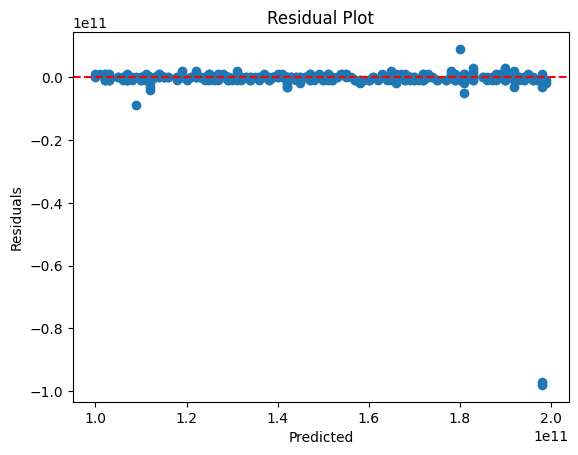

In [ ]:
# Residual Plot
residuals = y_test - y_pred_1
plt.scatter(y_pred_1, residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Using Model 1 to predict E1 for the entire dataset
predicted_E1 = model_1.predict(X)

# Preparing data for Model 2
X_model_2 = X.copy()
X_model_2['Predicted_E1'] = predicted_E1
y_model_2 = data['Member_1_name']

# Splitting the data into training and testing sets for Model 2
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_model_2, y_model_2, test_size=0.2, random_state=42)

# Building the decision tree model for predicting Member_1_name
model_2 = DecisionTreeClassifier(random_state=42)
model_2.fit(X_train_2, y_train_2)

# Predicting and evaluating the model
y_pred_2 = model_2.predict(X_test_2)
accuracy_2 = accuracy_score(y_test_2, y_pred_2)

print("Accuracy of the model:", accuracy_2)

Accuracy of the model: 0.6896551724137931


In [ ]:
data_preprocessed=data
data_preprocessed

,Member_1_name,Member_2_name,E1,E2,Frequency_1,Frequency_2,Frequency_3,Frequency_4,Frequency_5,Frequency_6,Frequency_7,Frequency_8
0,STEEL_COL1,NaN,100000000000,200000000000,2.702044,3.555486,4.296314,6.326884,6.541992,7.622354,7.713820,7.719549
1,STEEL_COL1,NaN,101000000000,200000000000,2.702456,3.556237,4.297659,6.327693,6.542130,7.622354,7.713821,7.720343
2,STEEL_COL1,NaN,102000000000,200000000000,2.702866,3.556984,4.299000,6.328497,6.542268,7.622354,7.713822,7.721134
3,STEEL_COL1,NaN,103000000000,200000000000,2.703273,3.557727,4.300338,6.329296,6.542406,7.622354,7.713824,7.721922
4,STEEL_COL1,NaN,104000000000,200000000000,2.703677,3.558467,4.301671,6.330090,6.542544,7.622354,7.713824,7.722707
...,...,...,...,...,...,...,...,...,...,...,...,...
1589,STEEL_BEAM37,STEEL_BEAM38,195000000000,195000000000,2.742950,3.630873,4.451584,6.409537,6.558065,7.622334,7.713801,7.809330
1590,STEEL_BEAM37,STEEL_BEAM38,196000000000,196000000000,2.743671,3.631506,4.451775,6.410154,6.558156,7.622341,7.713813,7.810100
1591,STEEL_BEAM37,STEEL_BEAM38,197000000000,197000000000,2.744388,3.632137,4.451964,6.410767,6.558246,7.622349,7.713824,7.810865
1592,STEEL_BEAM37,STEEL_BEAM38,198000000000,198000000000,2.745101,3.632766,4.452152,6.411377,6.558336,7.622356,7.713835,7.811627


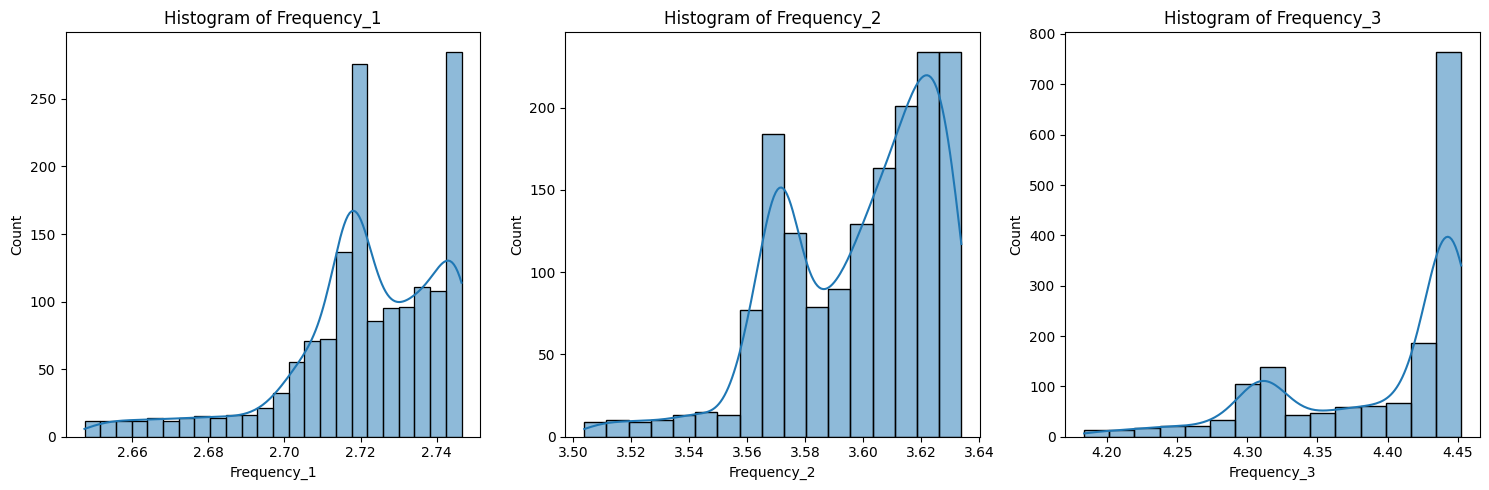

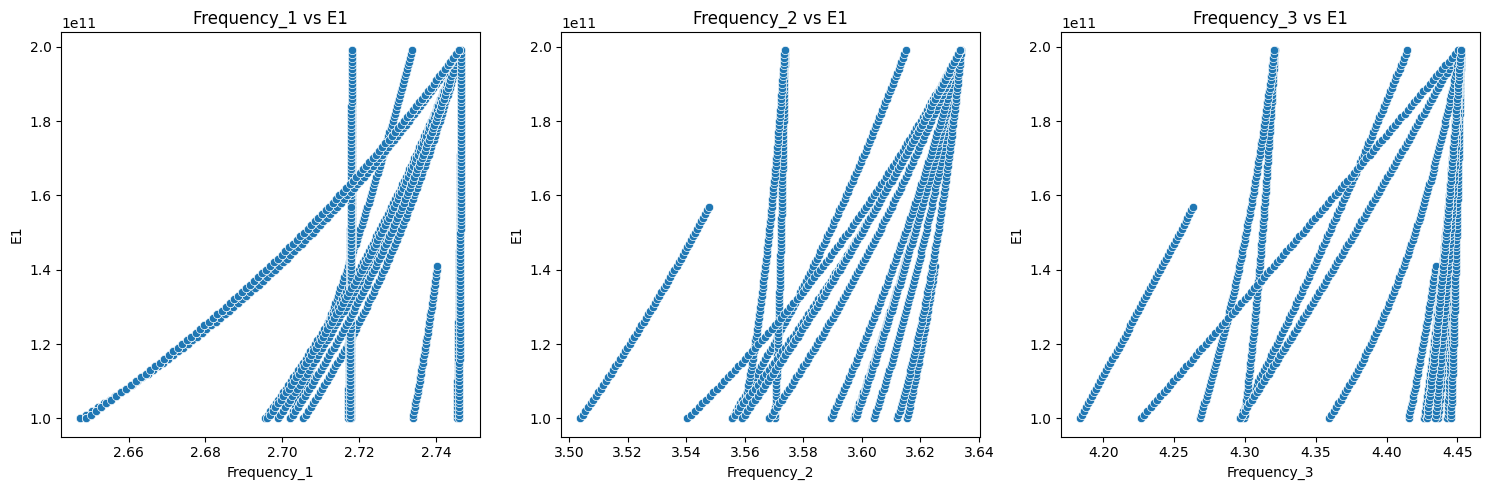

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
for i, col in enumerate(['Frequency_1', 'Frequency_2', 'Frequency_3']):
    plt.subplot(1, 3, i+1)
    sns.histplot(data_preprocessed[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

# Scatter Plots
plt.figure(figsize=(15, 5))
for i, col in enumerate(['Frequency_1', 'Frequency_2', 'Frequency_3']):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(data=data_preprocessed, x=col, y='E1')
    plt.title(f'{col} vs E1')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Features and target for Model 1
X = data_preprocessed.drop(columns=['E1', 'Member_1_name', 'Member_2_name'])
y = data_preprocessed['E1']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the GBM regressor
model_1_gbm = GradientBoostingRegressor(random_state=42)
model_1_gbm.fit(X_train, y_train)

# Predicting and evaluating
y_pred_1 = model_1_gbm.predict(X_test)
mse_1 = mean_squared_error(y_test, y_pred_1)
r2_1 = r2_score(y_test, y_pred_1)

print("MSE for Model 1:", mse_1)
print("R-squared for Model 1:", r2_1)

MSE for Model 1: 4.140540328385908e+19
R-squared for Model 1: 0.9504934557896073


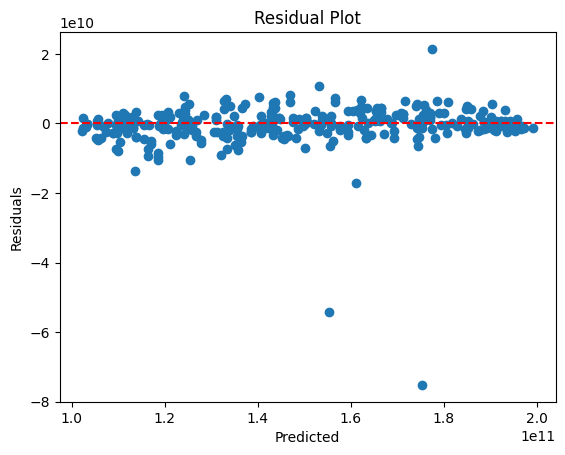

In [ ]:
# Residual Plot
residuals = y_test - y_pred_1
plt.scatter(y_pred_1, residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Predicting E1 for the entire dataset using the GBM regressor
predicted_E1 = model_1_gbm.predict(X)

# Preparing data for Model 2
X_model_2 = X.copy()
X_model_2['Predicted_E1'] = predicted_E1
y_model_2 = data_preprocessed['Member_1_name']

# Splitting the data for Model 2
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_model_2, y_model_2, test_size=0.2, random_state=42)

# Building the GBM classifier
model_2_gbm = GradientBoostingClassifier(random_state=42)
model_2_gbm.fit(X_train_2, y_train_2)

# Predicting and evaluating
y_pred_2 = model_2_gbm.predict(X_test_2)
accuracy_2 = accuracy_score(y_test_2, y_pred_2)

print("Accuracy for Model 2:", accuracy_2)


Accuracy for Model 2: 0.6959247648902821


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Preparing data for Model 1
X = data_preprocessed.drop(columns=['E1', 'Member_1_name', 'Member_2_name'])
y = data_preprocessed['E1']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Building the neural network model
model_1_nn = Sequential()
model_1_nn.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model_1_nn.add(Dense(64, activation='relu'))
model_1_nn.add(Dense(1))  # Output layer

# Compiling the model
model_1_nn.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model_1_nn.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Predicting and evaluating
y_pred_1 = model_1_nn.predict(X_test)
mse_1 = mean_squared_error(y_test, y_pred_1)
r2_1 = r2_score(y_test, y_pred_1)

print("MSE for Model 1:", mse_1)
print("R-squared for Model 1:", r2_1)


10/10 [==============================] - 0s 3ms/step
MSE for Model 1: 2.245538938228292e+22
R-squared for Model 1: -25.848880557792725


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Preparing data for Model 1
X = data_preprocessed.drop(columns=['E1', 'Member_1_name', 'Member_2_name'])
y = data_preprocessed['E1']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the Extra Trees Regressor
model_1_etr = ExtraTreesRegressor(n_estimators=100, random_state=42)
model_1_etr.fit(X_train, y_train)

# Predicting and evaluating
y_pred_1 = model_1_etr.predict(X_test)
mse_1 = mean_squared_error(y_test, y_pred_1)
r2_1 = r2_score(y_test, y_pred_1)

print("MSE for Model 1:", mse_1)
print("R-squared for Model 1:", r2_1)


MSE for Model 1: 8.137662460815046e+18
R-squared for Model 1: 0.990270169725828


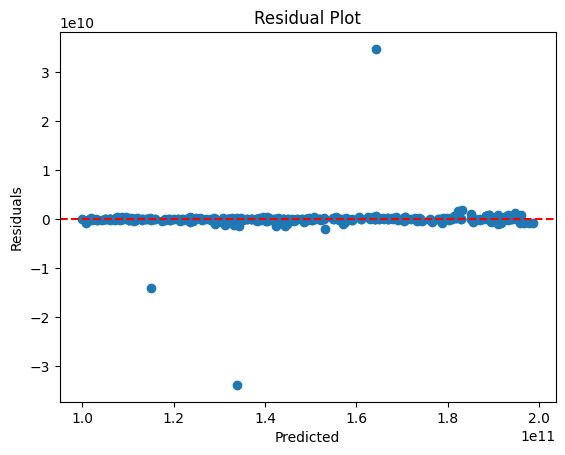

In [ ]:
# Residual Plot
residuals = y_test - y_pred_1
plt.scatter(y_pred_1, residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

# Using Model 1 (ETR) to predict E1 for the entire dataset
predicted_E1 = model_1_etr.predict(X)

# Preparing data for Model 2
X_model_2 = X.copy()
X_model_2['Predicted_E1'] = predicted_E1
y_model_2 = data_preprocessed['Member_1_name']

# Splitting the data for Model 2
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_model_2, y_model_2, test_size=0.2, random_state=42)

# Building the Extra Trees Classifier
model_2_etr = ExtraTreesClassifier(n_estimators=100, random_state=42)
model_2_etr.fit(X_train_2, y_train_2)

# Predicting and evaluating
y_pred_2 = model_2_etr.predict(X_test_2)
accuracy_2 = accuracy_score(y_test_2, y_pred_2)

print("Accuracy for Model 2:", accuracy_2)


Accuracy for Model 2: 0.7021943573667712


In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Building the HistGBM regressor
model_1_histgbm = HistGradientBoostingRegressor(random_state=42)
model_1_histgbm.fit(X_train, y_train)

# Predicting and evaluating
y_pred_1 = model_1_histgbm.predict(X_test)
mse_1 = mean_squared_error(y_test, y_pred_1)
r2_1 = r2_score(y_test, y_pred_1)

print("MSE for Model 1:", mse_1)
print("R-squared for Model 1:", r2_1)


/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


MSE for Model 1: 2.0908704864423993e+19
R-squared for Model 1: 0.9750004192772547


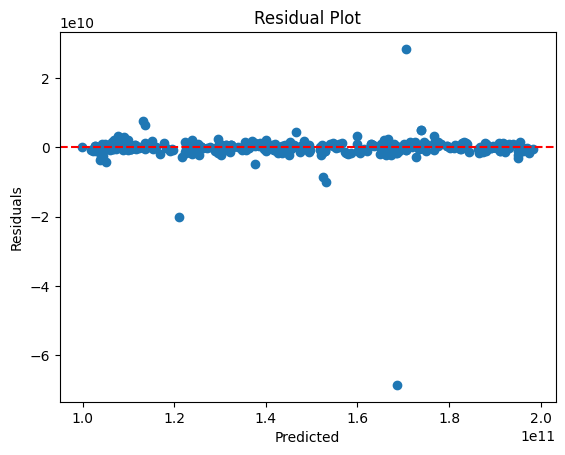

In [ ]:
# Residual Plot
residuals = y_test - y_pred_1
plt.scatter(y_pred_1, residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Predicting E1 for the entire dataset using the HistGBM regressor
predicted_E1 = model_1_histgbm.predict(X)



# Building the HistGBM classifier
model_2_histgbm = HistGradientBoostingClassifier(random_state=42)
model_2_histgbm.fit(X_train_2, y_train_2)

# Predicting and evaluating
y_pred_2 = model_2_histgbm.predict(X_test_2)
accuracy_2 = accuracy_score(y_test_2, y_pred_2)

print("Accuracy for Model 2:", accuracy_2)


Accuracy for Model 2: 0.6990595611285266


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Building the XGBoost regressor
model_1_xgb = XGBRegressor(random_state=42)
model_1_xgb.fit(X_train, y_train)

# Predicting and evaluating
y_pred_1 = model_1_xgb.predict(X_test)
mse_1 = mean_squared_error(y_test, y_pred_1)
r2_1 = r2_score(y_test, y_pred_1)

print("MSE for Model 1:", mse_1)
print("R-squared for Model 1:", r2_1)

MSE for Model 1: 1.9013559078454112e+19
R-squared for Model 1: 0.9772663582899737


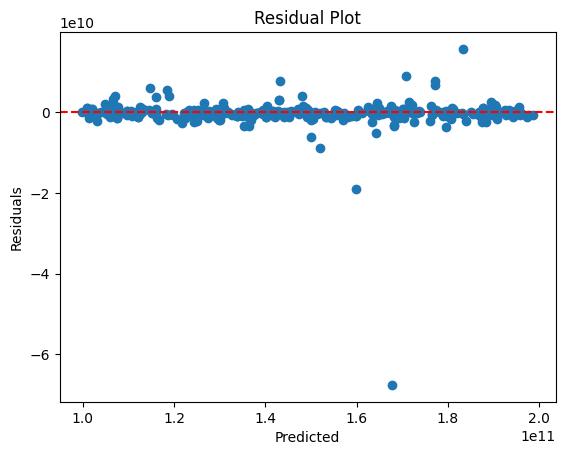

In [ ]:
# Residual Plot
residuals = y_test - y_pred_1
plt.scatter(y_pred_1, residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Predicting E1 for the entire dataset using the XGBoost regressor
predicted_E1 = model_1_xgb.predict(X)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label encoding for Member_1_name
label_encoder = LabelEncoder()
y_model_2_encoded = label_encoder.fit_transform(data_preprocessed['Member_1_name'])

# Preparing data for Model 2 with label encoding
X_model_2 = X.copy()
X_model_2['Predicted_E1'] = predicted_E1

# Splitting the data for Model 2
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_model_2, y_model_2_encoded, test_size=0.2, random_state=42)

# Building the XGBoost classifier with label encoded data
model_2_xgb = XGBClassifier(random_state=42)
model_2_xgb.fit(X_train_2, y_train_2)

# Predicting and evaluating with label encoded data
y_pred_2 = model_2_xgb.predict(X_test_2)
accuracy_2 = accuracy_score(y_test_2, y_pred_2)

print("Accuracy for Model 2 with Label Encoding:", accuracy_2)


Accuracy for Model 2 with Label Encoding: 0.6959247648902821


In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Building the SVR model
model_1_svr = SVR(kernel='rbf')
model_1_svr.fit(X_train, y_train)

# Predicting and evaluating
y_pred_1 = model_1_svr.predict(X_test)
mse_1 = mean_squared_error(y_test, y_pred_1)
r2_1 = r2_score(y_test, y_pred_1)

print("MSE for Model 1 (SVR):", mse_1)
print("R-squared for Model 1 (SVR):", r2_1)


MSE for Model 1 (SVR): 8.363636306120417e+20
R-squared for Model 1 (SVR): -1.6850699411374848e-06


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Standardizing the features for Model 2
X_model_2_scaled = scaler.fit_transform(X_model_2)

# Splitting the data for Model 2
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_model_2_scaled, y_model_2_encoded, test_size=0.2, random_state=42)

# Building the SVC model
model_2_svc = SVC(kernel='rbf', probability=True)
model_2_svc.fit(X_train_2, y_train_2)

# Predicting and evaluating
y_pred_2 = model_2_svc.predict(X_test_2)
accuracy_2 = accuracy_score(y_test_2, y_pred_2)

print("Accuracy for Model 2 (SVC):", accuracy_2)


Accuracy for Model 2 (SVC): 0.6865203761755486


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define the parameter grid for GBR
param_grid_gbr = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}
# Preparing data for Model 1
X = data_preprocessed.drop(columns=['E1', 'Member_1_name', 'Member_2_name'])
y = data_preprocessed['E1']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a base GBR model
gbr = GradientBoostingRegressor(random_state=42)

# Instantiate the grid search model for GBR
grid_search_gbr = GridSearchCV(estimator=gbr, param_grid=param_grid_gbr,
                               cv=3, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)

# Fit the grid search to the data for Model 1
grid_search_gbr.fit(X_train, y_train)

# Print the best parameters found for Model 1
print("Best parameters for GBR (Model 1):", grid_search_gbr.best_params_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters for GBR (Model 1): {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:
from sklearn.metrics import r2_score

# Using the best estimator found by grid search for Model 1
best_gbr_model = grid_search_gbr.best_estimator_

# Predicting with the best model
y_pred_1 = best_gbr_model.predict(X_test)

# Calculating R-squared for Model 1
r2_score_model_1 = r2_score(y_test, y_pred_1)

print("R-squared for the best GBR model (Model 1):", r2_score_model_1)


R-squared for the best GBR model (Model 1): 0.9673130582919511


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grid for GBC
param_grid_gbc = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}
X_model_2 = X.copy()
X_model_2['Predicted_E1'] = predicted_E1
y_model_2 = data_preprocessed['Member_1_name']

# Splitting the data for Model 2
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_model_2, y_model_2, test_size=0.2, random_state=42)


# Create a base GBC model
gbc = GradientBoostingClassifier(random_state=42)

# Instantiate the grid search model for GBC
grid_search_gbc = GridSearchCV(estimator=gbc, param_grid=param_grid_gbc,
                               cv=3, n_jobs=-1, scoring='accuracy', verbose=2)

# Fit the grid search to the data for Model 2
grid_search_gbc.fit(X_train_2, y_train_2)

# Print the best parameters found for Model 2
print("Best parameters for GBC (Model 2):", grid_search_gbc.best_params_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters for GBC (Model 2): {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
